In this project, we work with 2 datasets containing results of exit surveys from employees of the ['Department of Education, Training and Employment' (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) (last updated on 10/07/2019) and the ['Technical and Further Education' (TAFE) institute](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) (last updated on 11/09/2019) in Queensland, Australia.

Some slight modifications have been made to the original datasets to make them easier to work with, including changing the encoding of the file from 'cp1252' to 'UTF-8'

Our objective is to take on the role of a Data Analyst, and attempt to find answers to the following questions posed by our stakeholders by analysing the results of BOTH surveys as a whole:
<ol>
    <li>Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?</li>
    <li>Are younger employees resigning due to some kind of dissatisfaction? What about older employees?</li>
</ol>

While a data dictionary was not provided with the dataset, we are able to use general knowledge to define a few of the important ones that we will be working with mostly:

**DETE Survey**

|Column|Description|
|------|-----------|
|ID|ID used to identify the participant of the survey|
|SeparationType|The reason why the person's employment ended|
|Cease Data|The year or month the person's employment ended|
|DETE Start Date|The year the person began employment with the DETE|

**TAFE Survey**

|Column|Description|
|------|-----------|
|Record ID|An id used to identify the participant of the survey|
|Reason for ceasing employment|The reason why the person's employment ended|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|

In [1]:
# importing pandas and numpy

import pandas as pd
import numpy as np

In [2]:
# reading the .csv files

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


In [3]:
# printing first few rows and info from each survey

print('DETE Surveys\n\n')

print(dete_survey.info())
print(dete_survey.head())

print('\n\nTAFE Surveys\n\n')

print(tafe_survey.info())
print(tafe_survey.head())

DETE Surveys


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector 

In [4]:
print('DETE Surveys\n\n')

print(dete_survey['SeparationType'].value_counts())
print('')
print(dete_survey.isnull().sum())

print('\n\nTAFE Surveys\n\n')

print(tafe_survey['Reason for ceasing employment'].value_counts())
print('')
print(tafe_survey.isnull().sum())


DETE Surveys


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts              

Initial observations of the dataset reveal the following:

<ul>
    <li>There are 822 entries in total for DETE</li>
    <li>There are 702 entries in total for TAFE</li>
    <li>dtypes for dates are objects; not datetime yet</li>
    <li>The TAFE dataset has a significant amount of missing values for 'LengthofServiceOverall' (106)</li>
    <li>The DETE dataset contains 'Not Stated' values, which represents missing data</li>
    <li>The TAFE dataset contains '-' values</li>
</ul>

We hence first re-read the DETE dataset and use the pd.read_csv() function to read 'Not Stated' as 'NaN'. Then, we drop columns we won't be using in our analysis to remove excess clutter from both datasets.


In [5]:
# re-reading DETE dataset

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [6]:
# removing columns from DETE

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [7]:
# removing columns from TAFE

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In both dataframes, there are columns which contain the same information with slight differences in the naming convention. Since we wish to analyse both dataframes together, we need to standardise the names before merging them later.

**DETE Surveys**

We will rename them via the following criteria:
<ul>
    <li>Make all the capitalization lowercase.</li>
    <li>Remove any trailing whitespace from the end of the strings.</li>
    <li>Replace spaces with underscores ('_').</li>
</ul>

**TAFE Surveys**

We will rename them as per follows:
<ul>
    <li>'Record ID': 'id'</li>
    <li>'CESSATION YEAR': 'cease_date'
    <li>'Reason for ceasing employment': 'separationtype'
    <li>'Gender. What is your Gender?': 'gender'
    <li>'CurrentAge. Current Age': 'age'
    <li>'Employment Type. Employment Type': 'employment_status'
    <li>'Classification. Classification': 'position'
    <li>'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
    <li>'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
</ul>

In [8]:
# renaming DETE df columns

dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

# renaming TAFE df columns

rename_dict = {'Record ID': 'id',
              'CESSATION YEAR': 'cease_date',
              'Reason for ceasing employment': 'separationtype',
              'Gender. What is your Gender?': 'gender',               
              'Employment Type. Employment Type': 'employment_status',
              'CurrentAge. Current Age': 'age',
              'Classification. Classification': 'position',
              'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
              }
tafe_survey_updated.rename(mapper=rename_dict, axis=1, inplace=True)


In [9]:
# checking if renaming went well
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [10]:
# checking if renaming went well
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


As we are only focusing on people who have RESIGNED from their jobs, we will be filtering out our entries such that only those who have left the job by resigning are left. We do this by checking the 'separationtype' column.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':
<ul>
    <li>Resignation-Other reasons</li>
    <li>Resignation-Other employer</li>
    <li>Resignation-Move overseas/interstate</li>
</ul>

We will deal with these variations individually.


In [11]:
# checking the unique values in the 'separationtype' column for both datasets

print(dete_survey_updated['separationtype'].value_counts())
print('')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [12]:
# filtering datasets

dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()


In [13]:
# checking the filtered datasets

print(dete_resignations['separationtype'].value_counts())
print('')
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Resignation    340
Name: separationtype, dtype: int64


To ensure that our data is not corrupted and looks reasonable, we will be checking the data of several columns. The first of these will be the 'cease_date' and 'dete_start_date' columns. In particular, since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date (2019).

Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [14]:
print(dete_resignations['cease_date'].value_counts())
print('')
print(dete_resignations['dete_start_date'])
print('')
print(tafe_resignations['cease_date'])

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

3      2005.0
5      1994.0
8      2009.0
9      1997.0
11     2009.0
        ...  
808    2010.0
815    2012.0
816    2012.0
819    2009.0
821       NaN
Name: dete_start_date, Length: 311, dtype: float64

3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
        ...  
696    2013.0
697    2013.0
698    2013.0
699    2013.0
701    2013.0
Name: cease_date, Length: 340, dtype: float64


In [15]:
# begin by cleaning the date columns
# extracting the year from DETE's 'cease_date' column entries and putting into a new column 'cease_year'

dete_resignations['cease_year'] = dete_resignations['cease_date'].str.extract(r'(20[0,1][0-6])').astype(float)



In [16]:
# now we can check the values that show up in the various date columns
# we do so by arranging the value_counts series of each column in ascending order and check the tail and head

print(dete_resignations['cease_year'].value_counts().sort_index(ascending=True))
print('')
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True))
print('')
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=True))

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_year, dtype: int64

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


We hence observe and conclude that there are no anomalous data in the above columns.

In order to answer our first question, we need to have the years of service of both DETE and TAFE ex-employees. While such a column is readily available in the TAFE dataset ('institute_service'), we need to create one for the DETE dataset by subtracting the 'dete_start_date' from the 'cease_year'.

In [17]:
# creating an 'institute_service' column in the DETE df

dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']


In [18]:
print(dete_resignations['institute_service'].value_counts())

5.0     23
1.0     22
0.0     20
3.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
10.0     6
14.0     6
17.0     6
18.0     5
16.0     5
11.0     4
24.0     4
23.0     4
39.0     3
19.0     3
32.0     3
21.0     3
36.0     2
26.0     2
30.0     2
25.0     2
28.0     2
49.0     1
27.0     1
41.0     1
34.0     1
29.0     1
31.0     1
33.0     1
42.0     1
38.0     1
35.0     1
Name: institute_service, dtype: int64


We now need to define what reasons for resignation can be considered as employees being dissatisfied. The following reasons (as found in the respective dataframes) have been chosen as such.

**TAFE Surveys**

<ul>
    <li>Contributing Factors. Dissatisfaction
    <li>Contributing Factors. Job Dissatisfaction
</ul>

**DETE Surveys**

<ul>
    <li>job_dissatisfaction
    <li>dissatisfaction_with_the_department
    <li>physical_work_environment
    <li>lack_of_recognition
    <li>lack_of_job_security
    <li>work_location
    <li>employment_conditions
    <li>work_life_balance
    <li>workload
</ul>

If any of the above were indicated by the employee as their reason for resignation, we will immediately mark them as 'dissatisfied'.



In [19]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [20]:
# writing a function to update all values in the columns to either True or False

def update_vals(val):
    """function that returns either np.NaN (if value is NaN),
    False (if value is '-'), or True (all other values)"""
    if pd.isnull(val):
        return np.NaN
    elif val == '-':
        return False
    else:
        return True
    

In [21]:
# applying the update_vals function to TAFE dataset

tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [22]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [23]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
...,...,...
696,False,False
697,False,False
698,False,False
699,False,False


In [24]:
# check if any truth values in any columns and writes to a new column 'dissatisfied'

tafe_resignations['dissatisfied'] =  tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                      'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)


dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                         'dissatisfaction_with_the_department',
                                                         'physical_work_environment',
                                                         'lack_of_recognition',
                                                         'lack_of_job_security',
                                                         'work_location',
                                                         'employment_conditions',
                                                         'work_life_balance',
                                                         'workload']].any(axis=1, skipna=False)


In [25]:
print(tafe_resignations['dissatisfied'].value_counts())
print(dete_resignations['dissatisfied'].value_counts())

False    241
True      91
Name: dissatisfied, dtype: int64
False    162
True     149
Name: dissatisfied, dtype: int64


In [26]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

print(dete_resignations_up.shape)
print(tafe_resignations_up.shape)

(311, 38)
(340, 24)


We are now ready to combine both our datasets. Before doing so, we will create a column that allows us to distinguish between the DETE and TAFE datasets even after merging. We will be concatenating the datasets vertically (axis=0) so that we can later group the combined datasets' entries by the 'institute_service' column.

In [27]:
# creating the distinguishing column

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


In [28]:
# combining the datasets

combined = pd.concat([dete_resignations_up, tafe_resignations_up])


In [29]:
# checking the combined dataset

print(combined.shape)
print('')
print(combined['institute'])
print('')
print(combined.tail(3))

(651, 54)

3      DETE
5      DETE
8      DETE
9      DETE
11     DETE
       ... 
696    TAFE
697    TAFE
698    TAFE
699    TAFE
701    TAFE
Name: institute, Length: 651, dtype: object

               id separationtype cease_date  dete_start_date  role_start_date  \
698  6.350677e+17    Resignation     2013.0              NaN              NaN   
699  6.350704e+17    Resignation     2013.0              NaN              NaN   
701  6.350730e+17    Resignation     2013.0              NaN              NaN   

                    position classification region business_unit  \
698                      NaN            NaN    NaN           NaN   
699  Teacher (including LVT)            NaN    NaN           NaN   
701      Administration (AO)            NaN    NaN           NaN   

       employment_status  ... Contributing Factors. Ill Health  \
698                  NaN  ...                                -   
699  Permanent Full-time  ...                                -   
701      Contrac

We now proceed to drop columns that we will not be using for our analysis. We will be using the df.dropna() method to drop any columns with less than 500 null values.

In [30]:
# dropping useless columns

combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [31]:
print(combined_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')


In [32]:
print(combined_updated['institute_service'].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
17.0                   6
10.0                   6
22.0                   6
12.0                   6
14.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
30.0                   2
26.0                   2
25.0                   2
28.0                   2


Looking at the above values in the 'institute_service' column, it is clear that there are a large number of unique values. As such, we will be categorising these values into several ranges, in accordance to the categories laid out in [this BusinessWire article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). According to it, employees have different motivations and mindsets throughout the various stages in their career, as defined by how long they have been in service at a particular organisation. These are defined as:

<ol>
    <li> Newbie (0 - 3 years)
    <li> Sophomore (4 - 7 years)
    <li> Tenured (8 - 10 years)
    <li> Sage (> 11 years)
        

As part of our cleaning, in order to match the above categories, we will be making the following conversions of the entries:
<ul>
    <li>'More than 20 years' => 20
    <li>'Less than 1 year' => 0
    <li>'11-20' => 11
    <li>'7-10' => 8
    <li>'1-2' => 1
    <li>'3-4' => 3
    <li>'5-6' => 5
        

In [33]:
# changing the dtype to str

combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

# replacing the year ranges as per above conversion list

combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('More than 20 years', '20').str.replace('Less than 1 year', '0')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('11-20', '11').str.replace('7-10', '8')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('1-2', '1').str.replace('3-4', '3').str.replace('5-6', '5')


# changing the dtype to float

combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)


In [34]:
print(combined_updated['institute_service'].value_counts(dropna=False))
print(combined_updated['institute_service'].shape)

0.0     93
NaN     88
1.0     86
3.0     83
5.0     56
11.0    30
8.0     29
20.0    17
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
15.0     7
14.0     6
10.0     6
12.0     6
22.0     6
17.0     6
18.0     5
16.0     5
24.0     4
23.0     4
32.0     3
39.0     3
19.0     3
21.0     3
25.0     2
28.0     2
36.0     2
26.0     2
30.0     2
49.0     1
33.0     1
34.0     1
29.0     1
35.0     1
42.0     1
27.0     1
31.0     1
41.0     1
38.0     1
Name: institute_service, dtype: int64
(651,)


In [35]:
# creating a function that maps each value (and hence entry) to a category

def service_cat_map(val):
    """function that returns different categories for each value of institute_service"""
    """refer to the above list for details on categorisation"""
    
    if (val >= 0) and (val<=3):
        return 'Newbie'
    elif (val >= 4) and (val <= 7):
        return 'Sophomore'
    elif (val >= 8) and (val <= 10):
        return 'Tenured'
    elif val > 10:
        return 'Sage'
    elif pd.isnull(val):
        return np.NaN
    
    

In [36]:
# applying the service_cat_map() function to the 'institute_service' column and assigning to new 'service_cat' column

combined_updated['service_cat'] = combined_updated['institute_service'].apply(service_cat_map)

In [37]:
print(combined_updated['service_cat'].value_counts(dropna=False))
print(combined_updated['service_cat'].shape)

Newbie       276
Sage         136
Sophomore    102
NaN           88
Tenured       49
Name: service_cat, dtype: int64
(651,)


We now fill in the missing values in the 'dissatisfied' column by filling them in with the value that occurs most frequently in the column.

In [38]:
print(combined_updated['dissatisfied'].value_counts(ascending=False, dropna=False))

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


In [39]:
# fill in the missing values with False

combined_updated['dissatisfied'].fillna(False, inplace=True)

In [40]:
print(combined_updated['dissatisfied'].value_counts(ascending=False, dropna=False))

False    411
True     240
Name: dissatisfied, dtype: int64


We now use the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group.

Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. 

In [53]:
combined_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
print(combined_pivot)

             dissatisfied
service_cat              
Newbie           0.289855
Sage             0.485294
Sophomore        0.431373
Tenured          0.489796


We now plot a graph of the pivot table above.

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline


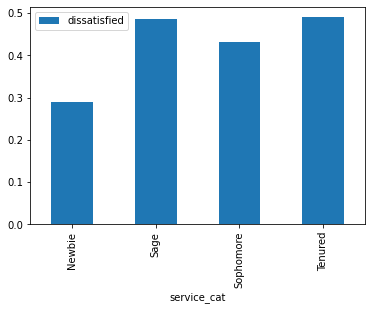

In [58]:
combined_pivot.plot(kind='bar', y='dissatisfied', )

plt.show()

From the above plot, we see that newbies who have only been at the institute for a short amount of time (between 0 and 3 years) do not mostly resign due to dissatisfactions with the job as < 30% of them indicated that they were dissatisfied.

On the other hand, a much larger proportion of employees who have been at the institute for a long time (such as Sages and Tenured employees) resigned due to dissatisfaction with the job, at close to 50% of each category.